# Cardiovascular Disease vs Determinants

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Resource files
CD_data_path = "Resources/Cardiovascular_Disease_Data.csv"
census_data_path = "Resources/2018_Census_Data.csv"

# Read the Cardiovascular Disease data and Census data
CD_data = pd.read_csv(CD_data_path, low_memory=False)
census_data = pd.read_csv(census_data_path, low_memory=False)

# State name to abbreviated version
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

# Cleaning Cardiovascular Data
CD_data = CD_data[CD_data["Year"]=="2018"] # Grabbing rows with the Year 2018 only
CD_data = CD_data[["Year", 
                   "LocationAbbr", 
                   "LocationDesc", 
                   "Topic", 
                   "Data_Value", 
                   "Stratification1"]] # Grabbing relevant columns
CD_data.columns = ["Year", 
                   "State", 
                   "County", 
                   "Disease Type", 
                   "Mortality per 100k", 
                   "Age Group"] # Renaming columns
CD_data["County, State"] = CD_data["County"] + " County, " + CD_data["State"] # Create a column that will be used to merge with other dataset
CD_data = CD_data[["Year", "County, State", "State", "Disease Type", "Mortality per 100k", "Age Group"]]

# Cleaning Census Data
census_data = census_data[["STATE",
                           "COUNTY",
                           "ACS_MEDIAN_HH_INC",
                           "ACS_PCT_COLLEGE_ASSOCIATE_DGR",
                           "ACS_PCT_BACHELOR_DGR",
                           "ACS_PCT_GRADUATE_DGR",
                           "ACS_PCT_HS_GRADUATE",
                           "ACS_PCT_LT_HS",
                           "ACS_PCT_MEDICARE_ONLY",
                           "ACS_PCT_PRIVATE_ANY",
                           "ACS_PCT_UNINSURED"]] # Grabbing relevant columns
census_data.columns = ["State",
                       "County",
                       "County Median Income",
                       "% College/Associate's Degree",
                       "% Bachelor Degree",
                       "% Graduate Degree",
                       "% Only HS Degree",
                       "% less than a HS Degree",
                       "% Medicare Only",
                       "% Private Insurance Only",
                       "% Uninsured"] # Renaming columns

census_data["County, State"] = census_data["County"] + ", " + census_data["State"].replace(us_state_to_abbrev) # Create a column that will be used to merge with other dataset
census_data["% HS Degree and Below"] = census_data["% Only HS Degree"] + census_data["% less than a HS Degree"]
census_data["% Above HS Degree"] = census_data["% College/Associate's Degree"] + census_data["% Bachelor Degree"] + census_data["% Graduate Degree"]
census_data = round(census_data.groupby("County, State").mean(), 3) # Average rows with same counties

census_data = census_data[["County Median Income",
                           "% HS Degree and Below",
                           "% Above HS Degree",
                           "% Medicare Only",
                           "% Private Insurance Only",
                           "% Uninsured"]]

df = pd.merge(CD_data, census_data, how = "left", left_on = "County, State", right_index = True).dropna(axis=0) # Merging cardiovascular data and census data
df_state_income = df.groupby("State")["County Median Income"].mean().rename("State Average Income") # Finding median income by state
df = pd.merge(df, df_state_income, how = "left", left_on = "State", right_index = True) # Adding column to main dataframe
df.head()

C:\Users\didie\AppData\Local\Temp\ipykernel_35416\4080562607.py:120: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  census_data = round(census_data.groupby("County, State").mean(), 3) # Average rows with same counties


,Year,"County, State",State,Disease Type,Mortality per 100k,Age Group,County Median Income,% HS Degree and Below,% Above HS Degree,% Medicare Only,% Private Insurance Only,% Uninsured,State Average Income
21,2018,"Autauga County, AL",AL,Stroke,23.5,Ages 35-64 years,55499.25,47.772,52.228,5.658,57.621,7.979,41685.122448
42,2018,"Autauga County, AL",AL,Coronary Heart Disease,87.9,Ages 35-64 years,55499.25,47.772,52.228,5.658,57.621,7.979,41685.122448
62,2018,"Autauga County, AL",AL,Stroke,368.6,Ages 65 years and older,55499.25,47.772,52.228,5.658,57.621,7.979,41685.122448
82,2018,"Autauga County, AL",AL,Coronary Heart Disease,689.9,Ages 65 years and older,55499.25,47.772,52.228,5.658,57.621,7.979,41685.122448
115,2018,"Baldwin County, AL",AL,Stroke,18.1,Ages 35-64 years,56782.71,40.205,59.796,7.462,59.858,10.276,41685.122448


## Exploratory Data Analysis (EDA)

### Summary Statistics for Mortality Rate by Age Group and Disease Type

In [3]:
# Establish desired statistical parameters to be calculated
stats = ['mean',
         'median', 
         'std',
         'min',
         'max'
]

df_stats = df.groupby(["Disease Type", "Age Group"])["Mortality per 100k"].agg(func=stats) # Generating stats dataframe
df_stats.columns = ["Mean", "Median", "Std", "Minimum", "Maximum"] # Renaming columns
df_stats



Mean  Median  \
Disease Type           Age Group                                     
Coronary Heart Disease Ages 35-64 years          70.898076    64.2   
                       Ages 65 years and older  628.655387   605.9   
Stroke                 Ages 35-64 years          16.864551    15.3   
                       Ages 65 years and older  267.846506   262.2   

                                                       Std  Minimum  Maximum  
Disease Type           Age Group                                              
Coronary Heart Disease Ages 35-64 years          31.149991     13.3    300.7  
                       Ages 65 years and older  175.914496    207.1   1609.8  
Stroke                 Ages 35-64 years           6.306468      5.6     48.1  
                       Ages 65 years and older   48.985936    107.9    596.4

### Distribution of Mortality Rate by Age Group and Disease Type

#### Disease Type: Coronary Heart Disease

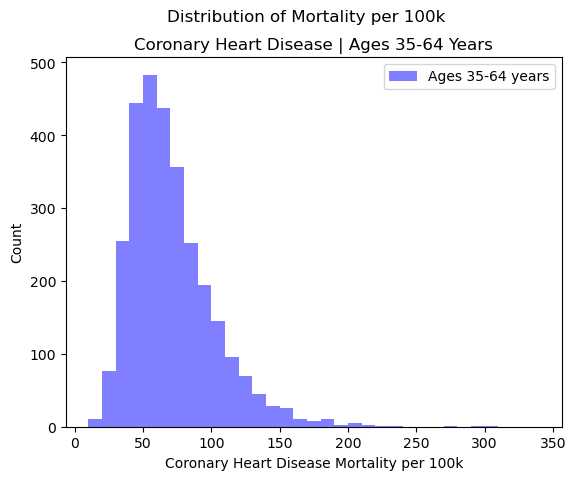

In [4]:
# Ages 35-64 years
bins = list(range(10, 350, 10))
plt.hist(df[(df["Age Group"] == "Ages 35-64 years") & (df["Disease Type"] == "Coronary Heart Disease")]["Mortality per 100k"], bins, alpha = 0.5, color = "blue", label = "Ages 35-64 years")
plt.xlabel("Coronary Heart Disease Mortality per 100k")
plt.ylabel("Count")
plt.suptitle("Distribution of Mortality per 100k")
plt.title("Coronary Heart Disease | Ages 35-64 Years")
plt.legend()

plt.show()

# Interpretation
The histogram of mortality by CHD of Ages 35-64 years is a right-skewed histogram. As it can be seen, it has a long tail on its right side and the peak of the data distribution is on the left side and the mean (70.89) is greater than the median (64.2). There may be some outliers on the right side of the graph which is indicated by tail of distribution on the right hand side is longer than the  tail on the left hand side.


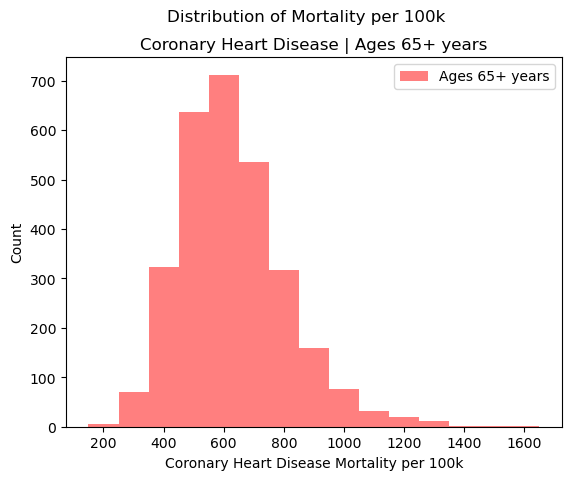

In [5]:
# Ages 65+ years
bins = list(range(150, 1750, 100))
plt.hist(df[(df["Age Group"] == "Ages 65 years and older") & (df["Disease Type"] == "Coronary Heart Disease")]["Mortality per 100k"], bins, alpha = 0.5, color = "red", label = "Ages 65+ years")
plt.xlabel("Coronary Heart Disease Mortality per 100k")
plt.ylabel("Count")
plt.suptitle("Distribution of Mortality per 100k")
plt.title("Coronary Heart Disease | Ages 65+ years")
plt.legend()



plt.show()

# Interpretation
The histogram of mortality by CHD of Ages 65+ years shows degree of asymmetry and is a right-skewed histogram. The mean of Ages 65+ years is 628.655, which is greater than its median of 628.655. Hence, there is a long tail on its right side and the peak of the data distribution is on the left side. There are some outliers on the right side of the graph with extreme values, that can been seen in the graph by the tail of distribution on the right hand side.


#### Disease Type: Stroke

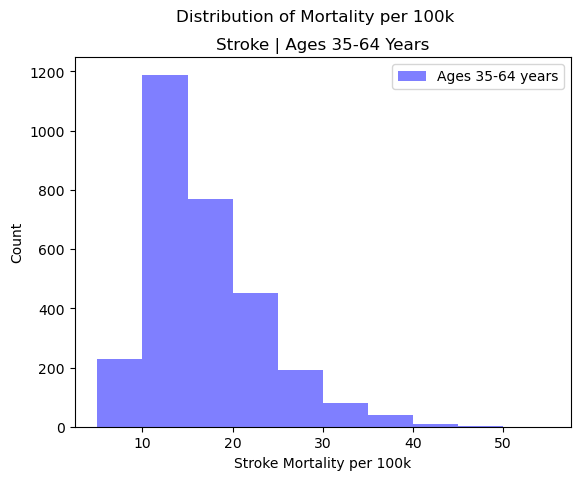

In [6]:
# Ages 35-64 years
bins = list(range(5, 60, 5))
plt.hist(df[(df["Age Group"] == "Ages 35-64 years") & (df["Disease Type"] == "Stroke")]["Mortality per 100k"], bins, alpha = 0.5, color = "blue", label = "Ages 35-64 years")
plt.xlabel("Stroke Mortality per 100k")
plt.ylabel("Count")
plt.suptitle("Distribution of Mortality per 100k")
plt.title("Stroke | Ages 35-64 Years")
plt.legend()
plt.show()

# Interpretation
The histogram of mortality by stroke of Ages 35-64 years shows right-skewness. Right-skewness is demonstrated when data points are not distributed symmetrically to the left and right sides of the median. As it is evident from summary statistics table and histogram which has a long tail on its right side and the peak of the data distribution is on the left side and the mean (16.86) is greater than the median (15.3).There may be some outliers on the right side of the graph but the number cannot be determined from the histogram. Boxplots will be used later to visualize outliers and will be presented later in the analysis.


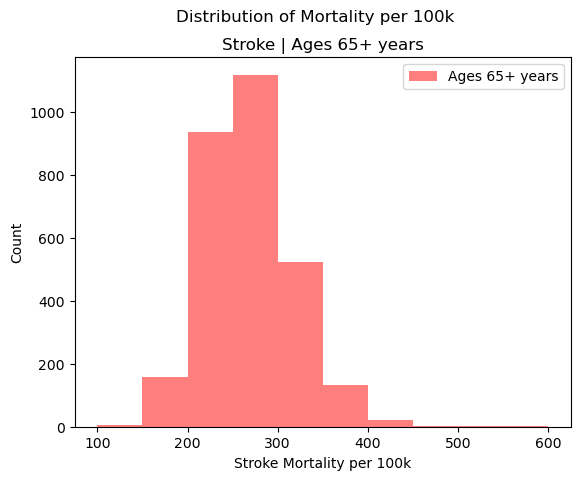

In [7]:
# Ages 65+ years
bins = list(range(100, 650, 50))
plt.hist(df[(df["Age Group"] == "Ages 65 years and older") & (df["Disease Type"] == "Stroke")]["Mortality per 100k"], bins, alpha = 0.5, color = "red", label = "Ages 65+ years")
plt.xlabel("Stroke Mortality per 100k")
plt.ylabel("Count")
plt.suptitle("Distribution of Mortality per 100k")
plt.title("Stroke | Ages 65+ years")
plt.legend()
plt.show()

# Interpretation
The histogram of mortality by stroke of Ages 65+ years shows degree of asymmetry and is a right-skewed histogram. The mean of Ages 65+ years is 267.84, which is greater than its median of 262.2. Hence, there is a long tail on its right side and the peak of the data distribution is on the left side. There may be some outliers on the right side of the graph with extreme values, that can been seen in the graph by the tail of distribution on the right hand side.

### Summary Statistics for State Average Income

In [8]:
# Establish desired statistical parameters to be calculated
stats = ['mean',
         'median', 
         'std',
         'min',
         'max'
        ]

df_stats = df[["State Average Income"]].agg(func=stats).transpose() # Generating stats dataframe
df_stats.columns = ["Mean", "Median", "Std", "Minimum", "Maximum"] # Renaming columns
round(df_stats, 2)

,Mean,Median,Std,Minimum,Maximum
State Average Income,52286.68,51642.75,7823.4,38350.88,83854.98


### Distribution of State Average Income

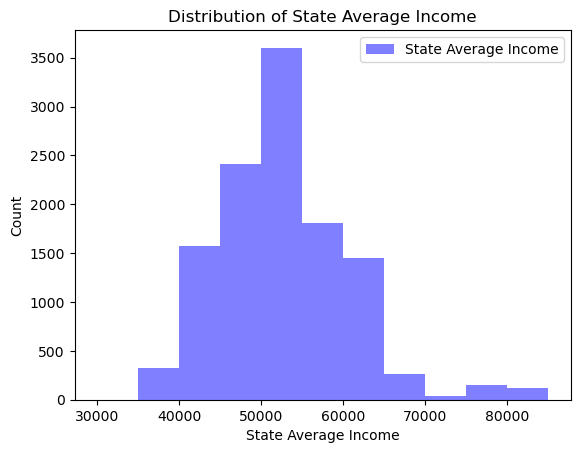

In [9]:
bins = list(range(30000, 90000, 5000))
plt.hist(df["State Average Income"], bins, alpha = 0.5, color = "blue", label = "State Average Income")
plt.xlabel("State Average Income")
plt.ylabel("Count")
plt.title("Distribution of State Average Income")
plt.legend()

# Interpretation
The histogram of state average income is slightly non-normal distribution. The histrogram is slightly right-skewed with mean greater than median. The sample of population's average income distribution histogram is slightly right-skewed, indicating that most people or households have moderate to low incomes. While there is still a general trend of decreasing frequencies as income increases, the tail on the right side of the histogram is not as long or pronounced as in a heavily right-skewed distribution.

This distribution pattern suggests that income inequality is less severe than in a substantially right-skewed distribution. It suggests that a large section of the population is middle-class, while a smaller number is wealthy. The presence of a slight right skewness can be attributed to many factors such as Education, skills, career prospects, and cost of living.

### Distribution of State Average Income

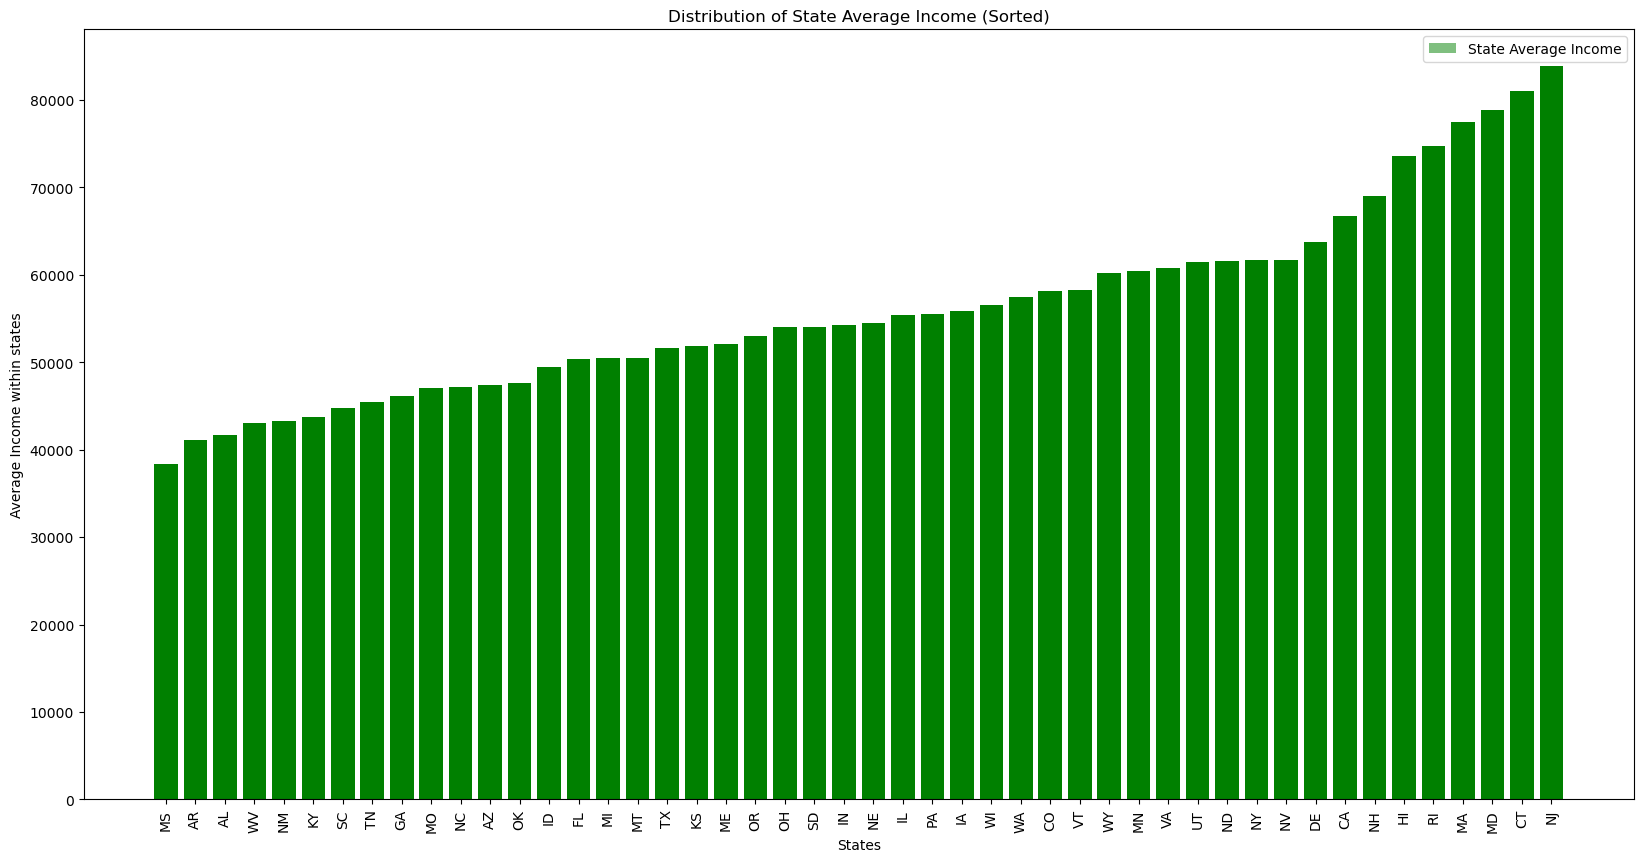

In [11]:
# DataFrame called df with columns "State" and "State Average Income"

# Combine "State" and "State Average Income" columns and sort in ascending order by income
sorted_data = sorted(zip(df["State"], df["State Average Income"]), key=lambda x: x[1])

# Extract sorted state and income values into separate lists
sorted_states, sorted_incomes = zip(*sorted_data)

# Plot the sorted bar graph
plt.figure(figsize = (20, 10))
plt.bar(sorted_states, sorted_incomes, alpha=0.5, color="green", label="State Average Income", align="center")

plt.xlabel("States")
plt.ylabel("Average Income within states")
plt.title("Distribution of State Average Income (Sorted)")

plt.xticks(rotation=90)  # Rotate the x-axis labels if needed

plt.legend()
plt.show()


# Findings from Visualization of the distribution of income levels across different states.
The above bar graph shows the ascending order visual representation of the state average income values in increasing order. It allows for comparisons between states and reveals patterns in income distribution across the dataset.
The ascending bars show the range of state average income values, indicating that different states have varying income levels. States with lower bars indicate relatively lower average incomes, while states with higher bars represent relatively higher average incomes.
The New Jersey (NJ) and Connecticut (CT) states have the highest bars on the graph that indicates these states have highest average income levels. Whereas, Mississippi (MS) state with the lowest bars represent that it has lowest average income levels.
The differences in bar heights reveals the disparities in income distribution across the states within USA. A significant variation in bar heights suggests a larger income disparity between the highest and lowest average incomes among the states. This can indicate the presence of income inequality within the dataset. The lowest average income level state MS as \\$38,350.88 as income and the highest average income level state NJ has \\$83,854.97 average income.

### Summary Statistics for Education

In [11]:
# Establish desired statistical parameters to be calculated
stats = ['mean',
         'median', 
         'std',
         'min',
         'max'
        ]

df_stats = df[["% HS Degree and Below",
               "% Above HS Degree"
              ]].agg(func=stats).transpose() # Generating stats dataframe
df_stats.columns = ["Mean", "Median", "Std", "Minimum", "Maximum"] # Renaming columns
df_stats

,Mean,Median,Std,Minimum,Maximum
% HS Degree and Below,48.014859,48.414,10.461118,12.295,79.230
% Above HS Degree,51.985146,51.585,10.461126,20.770,87.705


### Distribution of Education

Text(0, 0.5, 'Percent')

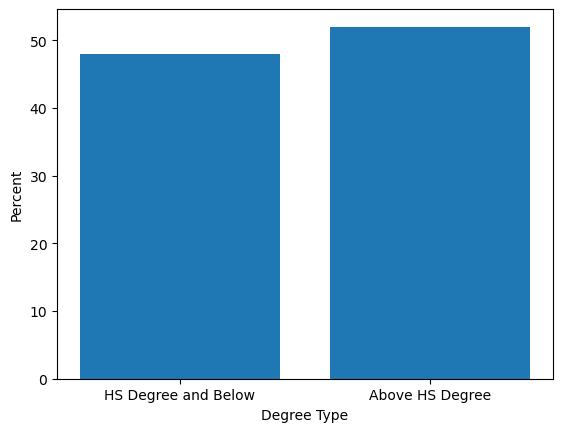

In [12]:
plt.bar(df_stats.index, df_stats["Mean"])
plt.xticks([0, 1], ["HS Degree and Below", "Above HS Degree"])
plt.xlabel("Degree Type")
plt.ylabel("Percent")

# Findings and Interpretation from Visualization of Degree Type:
The bar chart of degree type shows almost two equal ditribution. Data set has sample with  almost equal percentage of people with High school degree & below comparison to people with who have above high school degree. We can infer that data is normally distributed among the these two degree types as the mean and median of each degree type is almost same. 

### Summary Statistics for Insurance

In [13]:
# Establish desired statistical parameters to be calculated
stats = ['mean',
         'median', 
         'std',
         'min',
         'max'
        ]

df_stats = df[["% Medicare Only", 
               "% Private Insurance Only", 
               "% Uninsured"
              ]].agg(func=stats).transpose() # Generating stats dataframe

df_stats.columns = ["Mean", "Median", "Std", "Minimum", "Maximum"] # Renaming columns
df_stats

,Mean,Median,Std,Minimum,Maximum
% Medicare Only,6.063525,5.789,1.914337,1.512,16.145
% Private Insurance Only,57.833914,58.309,10.414717,12.940,85.620
% Uninsured,9.989589,9.114,4.913097,1.686,42.380


### Average State Mortality per 100k by Disease Type and Age Group

In [25]:
stroke35 = df[(df["Age Group"]=="Ages 35-64 years")&(df["Disease Type"]== "Stroke")].groupby(["State"])["Mortality per 100k"].mean()
stroke65 = df[(df["Age Group"]=="Ages 65 years and older")&(df["Disease Type"]== "Stroke")].groupby(["State"])["Mortality per 100k"].mean()
CHD35 = df[(df["Age Group"]=="Ages 35-64 years")&(df["Disease Type"]== "Coronary Heart Disease")].groupby(["State"])["Mortality per 100k"].mean()
CHD65 = df[(df["Age Group"]=="Ages 65 years and older")&(df["Disease Type"]== "Coronary Heart Disease")].groupby(["State"])["Mortality per 100k"].mean()

df_state_mortality = pd.concat([stroke35, stroke65, CHD35, CHD65], axis = 1)
df_state_mortality.columns = ["Stroke, 35", "Stroke, 65", "CDH, 35","CDH, 65"]
df_state_mortality.head()

,"Stroke, 35","Stroke, 65","CDH, 35","CDH, 65"
State,,,,
AL,27.794030,330.482090,74.156716,526.216418
AR,25.365333,287.253333,114.700000,797.326667
AZ,14.306667,217.760000,62.020000,603.913333
CA,14.778947,267.733333,47.568421,550.008772
CO,11.218033,228.510345,40.516393,437.720690


### Stacked Barplot of the Average State Mortalities

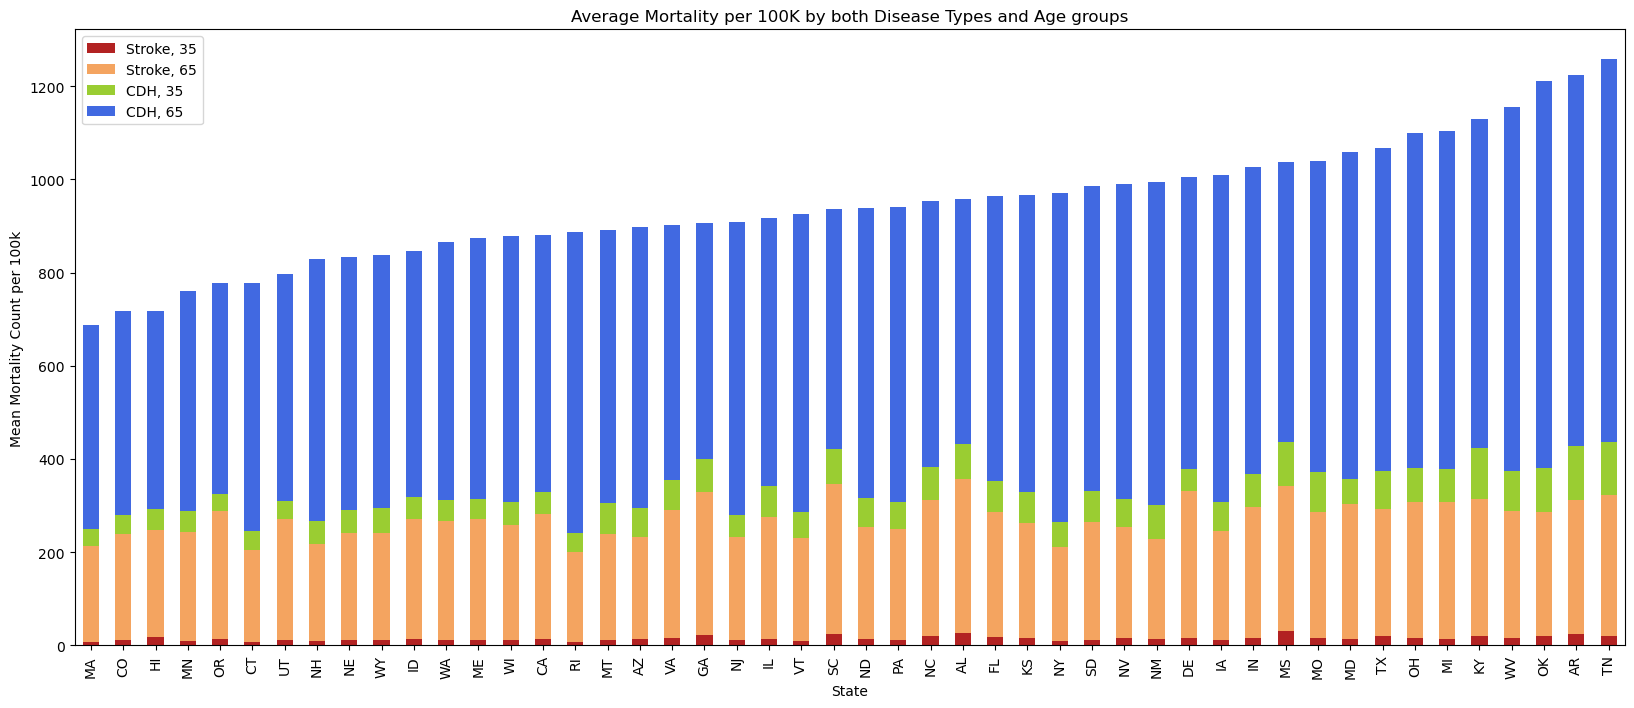

In [28]:
df_state_mortality["SUM"] = df_state_mortality.sum(axis = 1)
df_state_mortality = df_state_mortality.sort_values(by = "SUM")
bar_chart_states = df_state_mortality[["Stroke, 35", "Stroke, 65", "CDH, 35","CDH, 65"]].plot(kind = "bar", 
                                           color = ["firebrick", "sandybrown", "yellowgreen", "royalblue"], 
                                           figsize = (20,8), 
                                           ylabel = "Mean Mortality Count per 100k", 
                                           stacked = True)
plt.title ("Average Mortality per 100K by both Disease Types and Age groups")
plt.show()

In [42]:
# Calculating the mean of the "Mortality per 100k" column
mean_mortality = df["Mortality per 100k"].mean()

# Print the mean value
print("Mean Mortality per 100k:", mean_mortality)


Mean Mortality per 100k: 244.1018322822567


# Findings and Interpretation from Visualization of the Stacked Barplot:
The purpose of this stacked barplot visualization is to  better comprehend the pattern of average state mortality. The mortality count from both type of heart diseases (CHD and Stroke) and across all age groups in each state are graphically shown in the stacked barplot. Death rates in a state can be affected by a number of factors, and we can learn more about these influences by analyzing the distribution.

The analysis makes use of a dataset detailing state-level mortality rates per 100,000 residents. The rows of the dataset reflect the 50 states and the columns represent the two type of heart diseases and age categories (35-64 years and 65+ years). Specifically, we use stacked barplots, where each bar represents a state and is further subdivided into segments for each disease category and age group. Upon visualizing the stacked barplot of average state mortalities, several key observations can be made:

1. Disease Type Contributions: The vertical segments within each state's bar indicate the contributions of different disease types to overall mortality. The varying lengths of the segments reflect the relative impact of specific diseases in different states. The leading cause of mortality is by Coronoary heart disease (CHD) among 65+ years across all the states and followed by Stroke in the same age group.

2. Age Group Patterns: The color variations observed within each disease type category correspond to distinct age cohorts. Through an examination of the chromatic composition within individual segments, it is possible to gain insight into the variations in mortality rates among distinct age cohorts. The data visualization provides evidence that 65+ years age group people have more mortality by both heart disease type.This data has the potential to illuminate age-related vulnerability and inform focused interventions or healthcare measures. Hence, Centre of Disease control (CDC) should focus their research on how tp prevent heart diseases among this group and what are the possible causes other than age such as lifestyle, eating habits, finanical or emotional stress.

3. State Mortality Comparisons: The comparison of state mortalities can be made by analyzing the heights of the bars, which allows for the identification of variations in average mortality rates across different states. States with higher overall mortality rates are represented by higher bars such as Arizona (AR), Oklahoma (OK) and Tennessee (TN); whereas lower bars of states such as Massachusetts (MA) and Colorado (CO) indicate relatively lower average mortalities. This comparative analysis offers valuable insights into the regional disparities in mortality rates, thereby indicating the need for targeted interventions and additional research in particular geographic regions.

Lastly, one should not easily conclude that lower income states will have higher mortality rates. This pattern is very irregular as per the data visualization: one such case to note is that Georgia state is on lower side of average income but has lower mortality rates. Hence, there are various other factors that lead to heart disease and cause mortality.

### Distribution of Insurance

Text(0, 0.5, 'Percent')

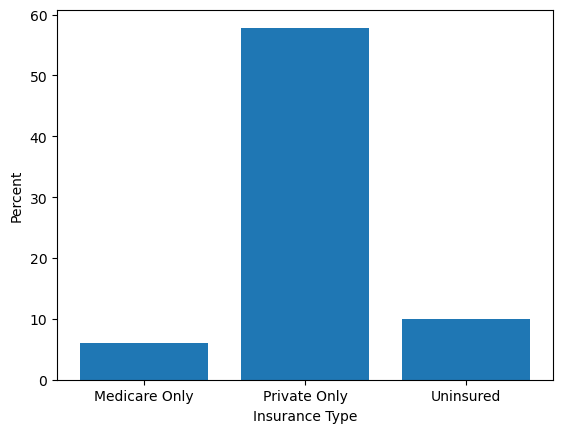

In [43]:
plt.bar(df_stats.index, df_stats["Mean"])
plt.xticks([0, 1, 2], ["Medicare Only", "Private Only", "Uninsured"])
plt.xlabel("Insurance Type")
plt.ylabel("Percent")

# Findings and Interpretation from Visualization of Insurance Type:

This data visualizes and understands the distribution of insurance types in the US, specifically "Medicare Only," "Private Only," and "Uninsured." The bar chart shows the proportion of each insurance type, revealing coverage gaps and healthcare access issues. The bar chart illustrates the following:

Medicare Only: The height of the "Medicare Only" bar represents the percentage of people who use Medicare for health insurance. The bar's height shows population Medicare coverage which is very low as compared to other two types of insurance.

Private Only: The "Private Only" bar shows the percentage of people with private health insurance only. Employers, individuals, and organizations offer private insurance. The bar's height shows private insurance's involvement in healthcare is more popular among the people. 

Uninsured: The "Uninsured" bar shows the percentage of people without health insurance. These people lack insurance. Understanding the uninsured population helps reveal healthcare gaps and needs support.

## DataFrame Analysis: Linear Regression Equations & R-values

### Compared to Income

In [17]:
disease_type = ["Coronary Heart Disease", "Stroke"]
age_group = ["Ages 35-64 years", "Ages 65 years and older"]

equations = []
r_values = []
diseases = []
ages = []

for disease in disease_type:
    for age in age_group:
        data = df[(df["Disease Type"] == disease) & (df["Age Group"] == age)].groupby("State")
        x = data["State Average Income"].mean()
        y = data["Mortality per 100k"].mean()
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
        line_eq = str(round(slope,5)) + "x + " + str(round(intercept,2))
        equations.append(line_eq)
        r_values.append(rvalue)
        diseases.append(disease)
        ages.append(age)
            
tuples = list(zip(*[diseases, ages]))
index = pd.MultiIndex.from_tuples(tuples, names=["Disease Type", "Age Group"])
data = {"Linear EQs": equations, "r-values": r_values}
pd.DataFrame(data = data, index = index)

Linear EQs  r-values
Disease Type           Age Group                                            
Coronary Heart Disease Ages 35-64 years         -0.00126x + 133.98 -0.692173
                       Ages 65 years and older  -0.00284x + 769.48 -0.311891
Stroke                 Ages 35-64 years           -0.0003x + 32.35 -0.642087
                       Ages 65 years and older  -0.00178x + 356.74 -0.556237

- negative relationship

### Compared to Education

In [18]:
disease_type = ["Coronary Heart Disease", "Stroke"]
age_group = ["Ages 35-64 years", "Ages 65 years and older"]
education_level = ["% HS Degree and Below", "% Above HS Degree"]

equations = []
r_values = []
educations = []
diseases = []
ages = []

for education in education_level:
    for disease in disease_type:
        for age in age_group:
            data = df[(df["Disease Type"] == disease) & (df["Age Group"] == age)].groupby("State")
            x = data[education].mean()
            y = data["Mortality per 100k"].mean()
            (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
            line_eq = str(round(slope,5)) + "x + " + str(round(intercept,2))
            equations.append(line_eq)
            r_values.append(rvalue)
            educations.append(education)
            diseases.append(disease)
            ages.append(age)
            
tuples = list(zip(*[educations, diseases, ages]))
index = pd.MultiIndex.from_tuples(tuples, names=["Education Level", "Disease Type", "Age Group"])
data = {"Linear EQs": equations, "r-values": r_values}
pd.DataFrame(data = data, index = index)

Linear EQs  \
Education Level       Disease Type           Age Group                                      
% HS Degree and Below Coronary Heart Disease Ages 35-64 years            2.55578x + -52.4   
                                             Ages 65 years and older     8.4606x + 228.11   
                      Stroke                 Ages 35-64 years           0.55997x + -10.03   
                                             Ages 65 years and older     3.40033x + 103.4   
% Above HS Degree     Coronary Heart Disease Ages 35-64 years          -2.55576x + 203.18   
                                             Ages 65 years and older  -8.46054x + 1074.17   
                      Stroke                 Ages 35-64 years           -0.55997x + 45.97   
                                             Ages 65 years and older   -3.40028x + 443.43   

                                                                      r-values  
Education Level       Disease Type           Age Group                          
% HS Degree and Below Coronary Heart Disease Ages 35-64 years         0.861836  
                                             Ages 65 years and older  0.571237  
                      Stroke                 Ages 35-64 years         0.727201  
                                             Ages 65 years and older  0.654235  
% Above HS Degree     Coronary Heart Disease Ages 35-64 years        -0.861838  
                                             Ages 65 years and older -0.571235  
                      Stroke                 Ages 35-64 years        -0.727209  
                                             Ages 65 years and older -0.654230

- negative relationship(above HS degree) and positive relationships (below HS degree)

### Compared to Insurance

In [19]:
disease_type = ["Coronary Heart Disease", "Stroke"]
age_group = ["Ages 35-64 years", "Ages 65 years and older"]
insurance_type = ["% Medicare Only",
                  "% Private Insurance Only",
                  "% Uninsured"]

equations = []
r_values = []
insurances = []
diseases = []
ages = []

for insurance in insurance_type:
    for disease in disease_type:
        for age in age_group:
            data = df[(df["Disease Type"] == disease) & (df["Age Group"] == age)].groupby("State")
            x = data[insurance].mean()
            y = data["Mortality per 100k"].mean()
            (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
            line_eq = str(round(slope,5)) + "x + " + str(round(intercept,2))
            equations.append(line_eq)
            r_values.append(rvalue)
            insurances.append(insurance)
            diseases.append(disease)
            ages.append(age)
            
tuples = list(zip(*[insurances, diseases, ages]))
index = pd.MultiIndex.from_tuples(tuples, names=["Insurance Type", "Disease Type", "Age Group"])
data = {"Linear EQs": equations, "r-values": r_values}
pd.DataFrame(data = data, index = index)

Linear EQs  \
Insurance Type           Disease Type           Age Group                                     
% Medicare Only          Coronary Heart Disease Ages 35-64 years         12.68076x + -12.09   
                                                Ages 65 years and older  26.46224x + 453.18   
                         Stroke                 Ages 35-64 years            3.2542x + -4.01   
                                                Ages 65 years and older  14.21264x + 172.69   
% Private Insurance Only Coronary Heart Disease Ages 35-64 years         -1.70636x + 163.71   
                                                Ages 65 years and older  -3.44704x + 813.25   
                         Stroke                 Ages 35-64 years           -0.49719x + 44.6   
                                                Ages 65 years and older  -2.34226x + 395.05   
% Uninsured              Coronary Heart Disease Ages 35-64 years           2.31722x + 42.27   
                                                Ages 65 years and older   2.44275x + 588.05   
                         Stroke                 Ages 35-64 years            0.84728x + 7.68   
                                                Ages 65 years and older   4.11354x + 220.17   

                                                                         r-values  
Insurance Type           Disease Type           Age Group                          
% Medicare Only          Coronary Heart Disease Ages 35-64 years         0.583307  
                                                Ages 65 years and older  0.246151  
                         Stroke                 Ages 35-64 years         0.576479  
                                                Ages 65 years and older  0.376745  
% Private Insurance Only Coronary Heart Disease Ages 35-64 years        -0.579553  
                                                Ages 65 years and older -0.236912  
                         Stroke                 Ages 35-64 years        -0.650324  
                                                Ages 65 years and older -0.458746  
% Uninsured              Coronary Heart Disease Ages 35-64 years         0.379825  
                                                Ages 65 years and older  0.080154  
                         Stroke                 Ages 35-64 years         0.534847  
                                                Ages 65 years and older  0.384645

- quality of insurance related to mortality rate
- private insurance has negative relationship
- public/no insurance has positive relationship

## Visual Analysis: Scatterplots

### Compared to Average State Income

-0.0012634987430558482
The correlation coefficient is -0.69217


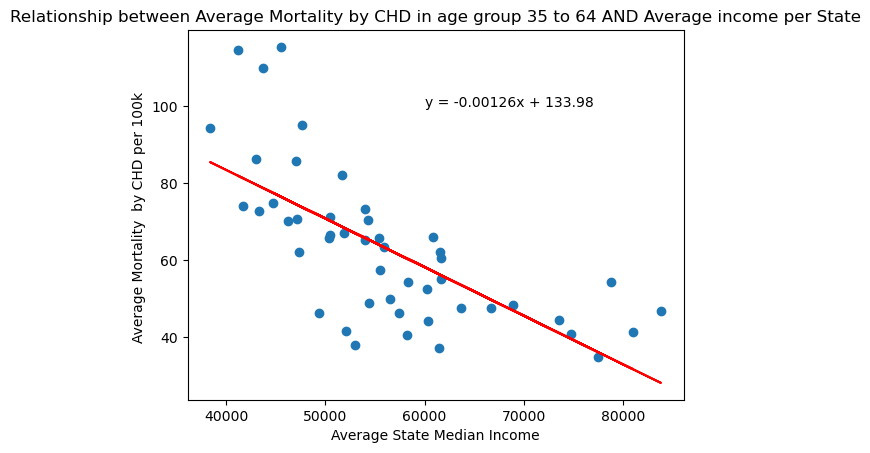

In [20]:
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 35-64 years")].groupby("State")
data.head()
x = data["State Average Income"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (60000, 100),fontsize=10)
plt.xlabel("Average State Income")
plt.ylabel("Average Mortality by CHD per 100k")
plt.title("Relationship between Average Mortality by CHD in age group 35 to 64 AND Average Income per State")
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

-0.0028422326091878366
The correlation coefficient is -0.31189


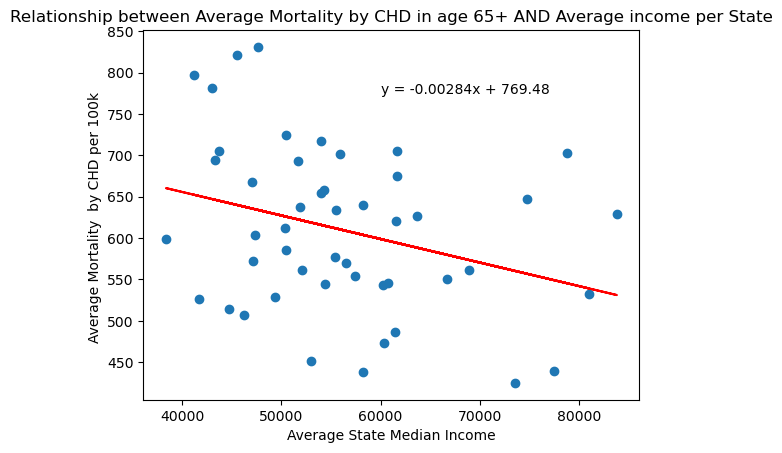

In [21]:
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 65 years and older")].groupby("State")
data.head()
x = data["State Average Income"].mean()
y = data["Mortality per 100k"].mean()
y
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (60000, 775),fontsize=10)
print(slope)
plt.xlabel("Average State Income")
plt.ylabel("Average Mortality by CHD per 100k")
plt.title("Relationship between Average Mortality by CHD in age 65+ AND Average income per State")
print(f"The correlation coefficient is {round(rvalue,5)}")

-0.0003043455682683757
The correlation coefficient is -0.64209


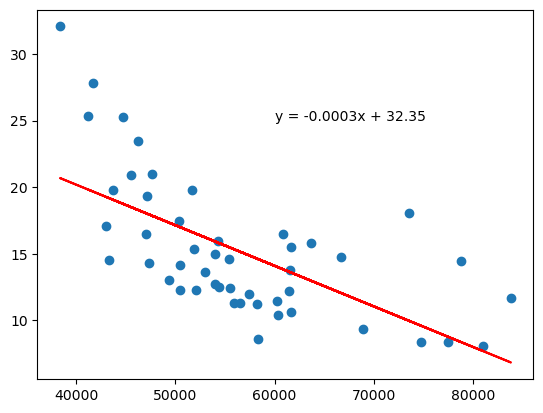

In [22]:
data = df[(df["Disease Type"] == "Stroke") & (df["Age Group"] == "Ages 35-64 years")].groupby("State")
x = data["State Average Income"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (60000, 25),fontsize=10)
plt.xlabel("Average State Median Income")
plt.ylabel("Average Mortality by Stroke per 100k")
plt.title("Relationship between Average Mortality by Stroke in Ages 35-64 years AND Average Income per State")
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

-0.0017787631274733648
The correlation coefficient is -0.55624


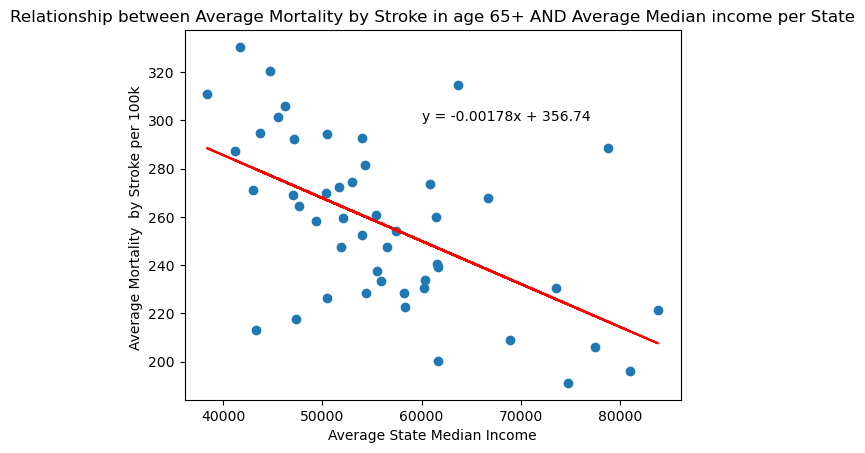

In [23]:
data = df[(df["Disease Type"] == "Stroke") & (df["Age Group"] == "Ages 65 years and older")].groupby("State")
x = data["State Average Income"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (60000, 300),fontsize=10)
plt.xlabel("Average State Income")
plt.ylabel("Average Mortality by Stroke per 100k")
plt.title("Relationship between Average Mortality by Stroke in age 65+ AND Average Income per State")
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

# ANALYSIS:
1. In the Regression by Average state Income & Mortality-Coronary Heart Disease of Ages 35-64 years, the coefficient was -0.69217, which shows there exist inverse (moderate negative) relationship betweem both the variables (*i.e.*, as the average state income increases by \\$1, the mortality rate by Coronary heart disease declines by 0.00126 persons for the age group 35-64 years). Furthemore, the graph of regression also reveals the small error variance as the scatter dots are close to regression line. Moreover within the same disease category, similar results were found with a coefficient of -0.31189 with weak negative relationhsip and small error variance; here, as the average state income increases by \\$1, the mortality rate by CDH declines by 0.00284 persons for the age group 65+).

2. In the Regression by average state Income & Mortality-Stroke of Ages 35-64 years and 65+ years, the coefficinet was -0.64209 and -0.55624, respectively. The slope is downward slopping which shows there exist inverse relationship betweem both the variables; however, the relationship is moderate for both age groups. Specifically, for age groups 35-64 and 65+ years, as the median income increases by \\$1, the mortality rate by stroke declines by 0.0003 and 0.00178 persons, respectively. Further, the graphs of regression also reveals the large error variance as the scatter dots are away from to regression line.

### Compared to Education Level (For CDH only)

-2.5557639750015544
The correlation coefficient is -0.86184


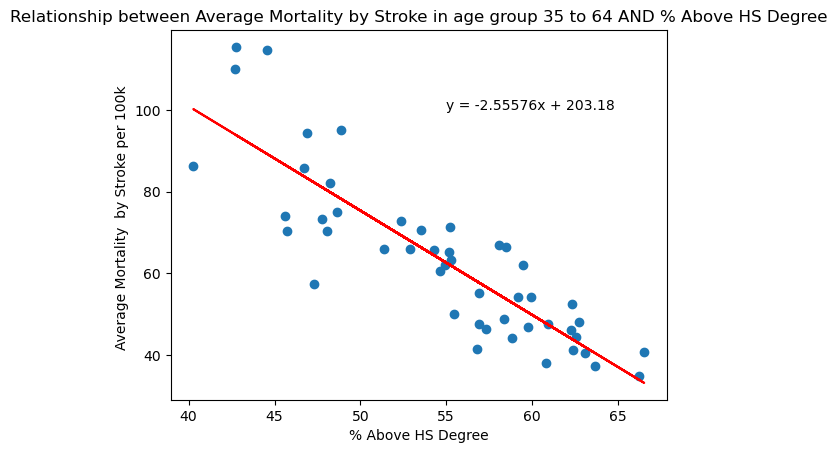

In [31]:
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 35-64 years")].groupby("State")
x = data["% Above HS Degree"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (55, 100),fontsize=10)
plt.xlabel("% Above HS Degree")
plt.ylabel("Average Mortality  by Stroke per 100k ")
plt.title("Relationship between Average Mortality by Stroke in age group 35 to 64 AND % Above HS Degree")
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

2.555776392979112
The correlation coefficient is 0.86184


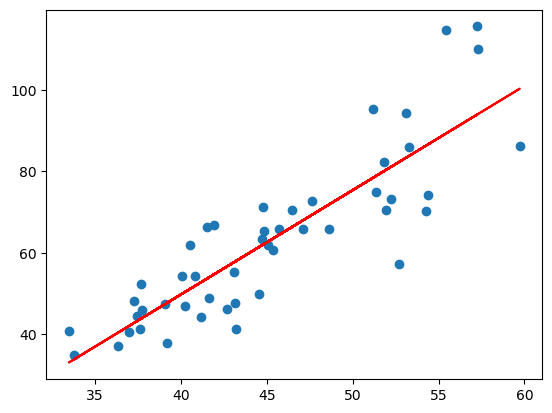

In [32]:
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 35-64 years")].groupby("State")
x = data["% HS Degree and Below"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (16, 90),fontsize=10)
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

-8.46053657496173
The correlation coefficient is -0.57123


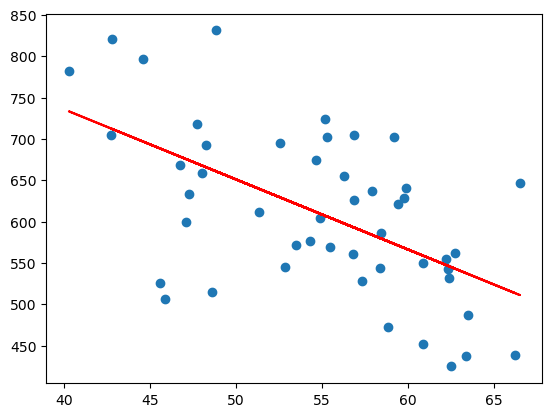

In [34]:
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 65 years and older")].groupby("State")
x = data["% Above HS Degree"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (8, 90),fontsize=10)
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

8.460604535044217
The correlation coefficient is 0.57124


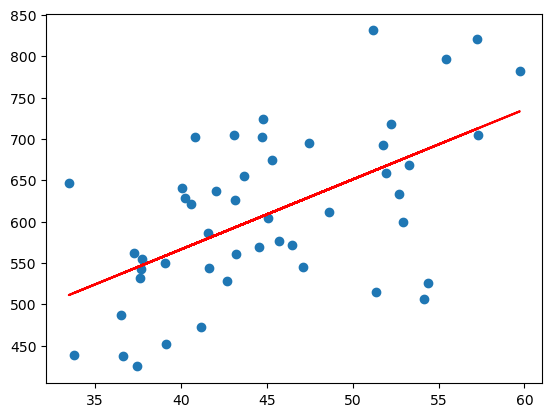

In [35]:
data = df[(df["Disease Type"] == "Coronary Heart Disease") & (df["Age Group"] == "Ages 65 years and older")].groupby("State")
x = data["% HS Degree and Below"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (25, 100),fontsize=10)
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

### Comparing High/Low Levels of Income AND Education again OVERALL Mortality

3.9341904216059556
The correlation coefficient is 0.65288


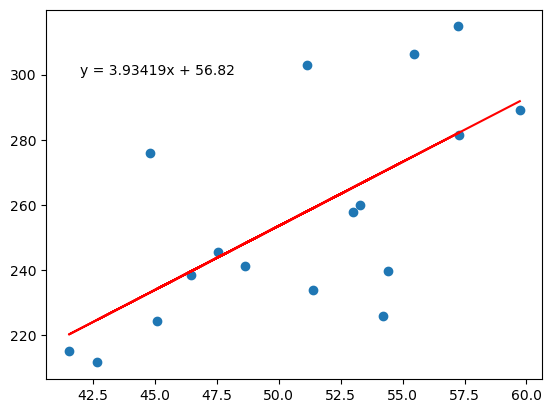

In [59]:
# LOW LOW
data = df_lower.groupby("State")
x = data["% HS Degree and Below"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (42, 300),fontsize=10)
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

-3.6385934295740627
The correlation coefficient is -0.71695


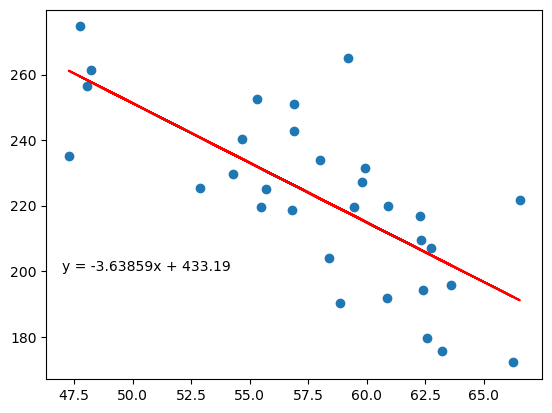

In [62]:
# HIGH HIGH
data = df_upper.groupby("State")
x = data["% Above HS Degree"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (47, 200),fontsize=10)
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

3.638635271970034
The correlation coefficient is 0.71695


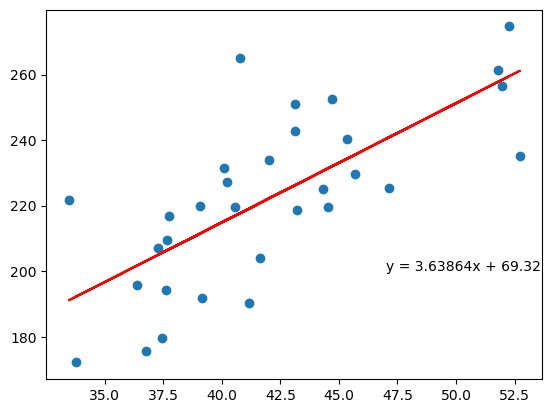

In [61]:
# HIGH LOW
data = df_upper.groupby("State")
x = data["% HS Degree and Below"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (47, 200),fontsize=10)
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

-3.934149210889938
The correlation coefficient is -0.65287


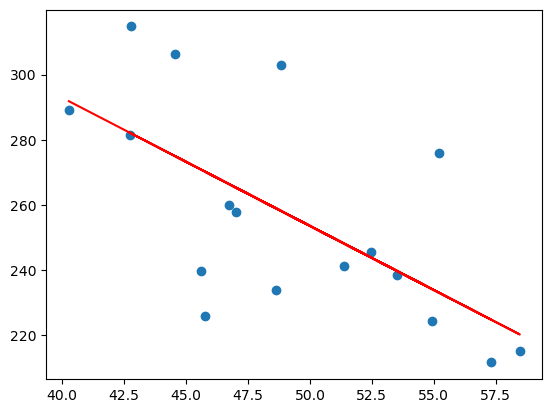

In [63]:
# LOW HIGH
data = df_lower.groupby("State")
x = data["% Above HS Degree"].mean()
y = data["Mortality per 100k"].mean()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (47, 200),fontsize=10)
print(slope)
print(f"The correlation coefficient is {round(rvalue,5)}")

In [80]:
disease_type = ["Coronary Heart Disease", "Stroke"]
age_group = ["Ages 35-64 years", "Ages 65 years and older"]
income_cutoff = 51642.75

t_scores = []
p_values = []
diseases = []
ages = []

for disease in disease_type:
    for age in age_group:
        data = df[(df["Disease Type"] == disease) & (df["Age Group"] == age)]
        df_upper = data[data["State Average Income"] > income_cutoff]
        df_lower = data[data["State Average Income"] <= income_cutoff]
        x = df_lower["Mortality per 100k"]
        y = df_upper["Mortality per 100k"]
        (t_score, p_value) = st.ttest_ind(df_lower["Mortality per 100k"], df_upper["Mortality per 100k"])
        t_scores.append(t_score)
        p_values.append(p_value)
        diseases.append(disease)
        ages.append(age)
            
tuples = list(zip(*[diseases, ages]))
index = pd.MultiIndex.from_tuples(tuples, names=["Disease Type", "Age Group"])
data = {"T scores": t_scores, "p-values": p_values}
pd.DataFrame(data = data, index = index)

T scores       p-values
Disease Type           Age Group                                        
Coronary Heart Disease Ages 35-64 years         22.151561  9.989599e-101
                       Ages 65 years and older   6.744408   1.847012e-11
Stroke                 Ages 35-64 years         31.464938  1.017271e-187
                       Ages 65 years and older  19.718548   2.494604e-81